In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install kaggle
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))
  
# # Then move kaggle.json into the folder where the API expects to find it.
# !mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d vmalyi/run-or-walk
# !echo "Unzipping..."
# !unzip -q -u -d run-or-walk run-or-walk.zip
# !echo "Done. Dataset in dir ./run-or-walk"
# !echo
# !ls

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

#data = pd.read_csv('./drive/MyDrive/dataset.csv')
data = np.load('./drive/MyDrive/dane_jako_nparray.npy', allow_pickle=True)
new_data_x = []
for x in range(data.shape[0]):
  new_data_x.append([])
  for y in range(data.shape[1]):
    new_data_x[x].append(data[x][y]['acc_x'])
    new_data_x[x].append(data[x][y]['acc_y'])
    new_data_x[x].append(data[x][y]['acc_z'])
    new_data_x[x].append(data[x][y]['gyro_x'])
    new_data_x[x].append(data[x][y]['gyro_y'])
    new_data_x[x].append(data[x][y]['gyro_z'])

new_data_y = [[y['sitting'] for y in x] for x in data.tolist()]
# data=data.drop(["time", "date", "username", "wrist"],axis=1)
# data_list = data.values.tolist()
print(new_data_y)
sitting_threshold=0.75
for y in range(len(new_data_y)):
  sum=0
  count=0
  mean=0
  for i in range(len(new_data_y[y])):
    sum+=new_data_y[y][i]
    count+=1
  mean=sum/count
  if mean >= sitting_threshold:
    new_data_y[y]=1
  else:
    new_data_y[y]=0  
Y=new_data_y
X=new_data_x

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=1)

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
import tensorflow

class MLP:
    def __init__(self):

        self.input_shape = (6000)
        self.mlp = tensorflow.keras.models.Sequential()
        self.mlp.add(tensorflow.keras.Input(shape=self.input_shape))
        self.mlp.add(tensorflow.keras.layers.Dense(3000,activation='relu'))
        self.mlp.add(tensorflow.keras.layers.Dense(2500,activation='relu'))
        #self.mlp.add(tensorflow.keras.layers.Dense(1000,activation='relu'))
        #self.mlp.add(tensorflow.keras.layers.Dense(500,activation='relu'))
        #self.mlp.add(tensorflow.keras.layers.Dense(200,activation='relu'))
        #self.mlp.add(tensorflow.keras.layers.Dense(50,activation='relu'))
        self.mlp.add(tensorflow.keras.layers.Dense(1,activation='softmax'))

        optimizer = tensorflow.keras.optimizers.Adam(0.0001, 0.5)
        self.mlp.compile( loss=["binary_crossentropy"], optimizer=optimizer, metrics=["accuracy"])

    def train(self, x, y, epochs, batch_size=125, sample_interval=50):
        x = np.asarray(x)
        y = np.asarray(y)

        for epoch in range(epochs):

            idx = np.random.randint(0, len(x), batch_size)
            input = x[idx]
            expected = y[idx]

            loss = self.mlp.train_on_batch(input, expected)

            # If at save interval => save
            if epoch % sample_interval == 0:
                print("%d [loss: %f, acc: %.2f%%]" % (epoch, loss[0], loss[1]))
    
    def save(self, out_dir_path):
        file_path = out_dir_path + 'mlp_model.ml'
        pickle.dump(self.mlp, open(file_path, 'wb'))


In [ ]:
mlp = MLP()

#mlp_x_train = np.array(x_train[0:60000])
#mlp_x_train = np.reshape(mlp_x_train, newshape=(60,1000,6))

#mlp_y_train = np.array(y_train[0:60000])
#mlp_y_train = np.reshape(mlp_y_train, newshape=(60,1000,1))

mlp.train(x_train, y_train, epochs=5000, batch_size=100, sample_interval=50)
mlp_results = mlp.mlp.evaluate(x_test, y_test, batch_size=128)

print("test loss: ", mlp_results[0])
print("accuracy score test: ", mlp_results[1])

In [22]:
import tensorflow
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(1)

In [23]:
#from tensorflow.keras.models import Sequential, Model
import tensorflow

class LSTM_Model:
    def __init__(self, units):
        # Build and compile the lstm
        self.lstm = self.build_lstm(units)


    def build_lstm(self, units):
        model = Sequential()
        model.add(tensorflow.keras.layers.LSTM(units))
        model.add(tensorflow.keras.layers.Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])

        return model

    def train(self, epochs, batch_size=100):

        X_train = np.array(x_train)
        Y_train = np.array(y_train)

        X_train = np.reshape(X_train, (X_train.shape[0], 1000, 6))

        self.lstm.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size)

    def save(self, destination_dir_path):
      file_path = destination_dir_path + 'lstm_model.ml'
      pickle.dump(self.lstm, open(file_path, 'wb')) 

In [24]:
#lstm = LSTM_Model(6)
#lstm.train(epochs=10, batch_size=100)

lstm = LSTM_Model(100)
lstm.train(epochs=100, batch_size=100)

lstm.save('./drive/MyDrive/content/')

Epoch 1/100
2/2 [==============================] - 5s 601ms/step - loss: 0.6256 - accuracy: 0.4331
Epoch 2/100
2/2 [==============================] - 3s 585ms/step - loss: 0.4468 - accuracy: 0.4646
Epoch 3/100
2/2 [==============================] - 2s 591ms/step - loss: 0.3301 - accuracy: 0.6220
Epoch 4/100
2/2 [==============================] - 2s 565ms/step - loss: 0.2408 - accuracy: 0.7874
Epoch 5/100
2/2 [==============================] - 2s 604ms/step - loss: 0.1841 - accuracy: 0.8268
Epoch 6/100
2/2 [==============================] - 2s 634ms/step - loss: 0.1736 - accuracy: 0.8504
Epoch 7/100
2/2 [==============================] - 2s 602ms/step - loss: 0.1596 - accuracy: 0.8425
Epoch 8/100
2/2 [==============================] - 2s 598ms/step - loss: 0.1427 - accuracy: 0.8425
Epoch 9/100
2/2 [==============================] - 2s 604ms/step - loss: 0.1311 - accuracy: 0.8740
Epoch 10/100
2/2 [==============================] - 2s 619ms/step - loss: 0.1287 - accuracy: 0.8819
Epoch 11/

INFO:tensorflow:Assets written to: ram://fbe8c7c9-bc0e-41a5-b2bf-3119cb6133d8/assets


INFO:tensorflow:Assets written to: ram://fbe8c7c9-bc0e-41a5-b2bf-3119cb6133d8/assets


In [27]:
input = np.reshape(x_test, (len(x_test), 1000, 6))
expected = np.array(y_test)

results = lstm.lstm.evaluate(input, expected, batch_size=128)
print("test loss: ", results[0])
print("accuracy score test: ", results[1])


1/1 [==============================] - 0s 266ms/step - loss: 0.4568 - accuracy: 0.7333
test loss:  0.4568227529525757
accuracy score test:  0.7333333492279053


In [28]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

class Classic:
    def __init__(self):
        
        self.forest = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=1)
        self.svm = SVC(C=10, kernel='rbf', class_weight='balanced', random_state=1)
        self.knn = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='kd_tree', leaf_size=15, p=1)
        self.bayes = GaussianNB(var_smoothing=5e-05)

    def knn_train(self, x, y):
      self.knn.fit(x, y)

    def svm_train(self, x, y):
      self.svm.fit(x, y)

    def bayes_train(self, x, y):
      self.bayes.fit(x, y)

    def forest_train(self, x, y):
      self.forest.fit(x,y)    

    def knn_save(self, destination_dir_path):
      file_path = destination_dir_path + 'knn_model.ml'
      pickle.dump(self.knn, open(file_path, 'wb'))

    def svm_save(self, destination_dir_path):
      file_path = destination_dir_path + 'svm_model.ml'
      pickle.dump(self.svm, open(file_path, 'wb'))

    def bayes_save(self, destination_dir_path):
      file_path = destination_dir_path + 'bayes_model.ml'
      pickle.dump(self.bayes, open(file_path, 'wb'))

    def forest_save(self, destination_dir_path):
      file_path = destination_dir_path + 'random_forest_model.ml'
      pickle.dump(self.forest, open(file_path, 'wb'))   

    def evaluate(self, classifier, x_train, y_train, x_test, y_test):
        print("accuracy score train: " + str(accuracy_score(y_train, classifier.predict(x_train))))
        print("accuracy score test: " + str(accuracy_score(y_test, classifier.predict(x_test))))
        print("precision score test: " + str(precision_score(y_test, classifier.predict(x_test))))
        print("recall score test: " + str(recall_score(y_test, classifier.predict(x_test))))
        print("f1 score test: " + str(f1_score(y_test, classifier.predict(x_test))))

    def knn_evaluate(self, x_train, y_train, x_test, y_test):
      self.evaluate(self.knn, x_train, y_train, x_test, y_test)
    
    def svm_evaluate(self, x_train, y_train, x_test, y_test):
      self.evaluate(self.svm, x_train, y_train, x_test, y_test)

    def bayes_evaluate(self, x_train, y_train, x_test, y_test):
      self.evaluate(self.bayes, x_train, y_train, x_test, y_test)

    def forest_evaluate(self, x_train, y_train, x_test, y_test):
      self.evaluate(self.forest, x_train, y_train, x_test, y_test)

classic = Classic()

accuracy score train: 1.0
accuracy score test: 0.8
precision score test: 1.0
recall score test: 0.7
f1 score test: 0.8235294117647058


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


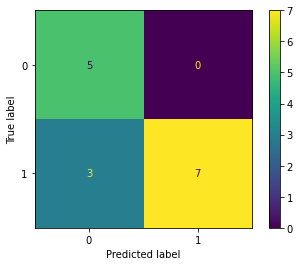

In [29]:
classic.forest_train(x_train, y_train)
classic.forest_evaluate(x_train, y_train, x_test, y_test)

plot_confusion_matrix(classic.forest, x_test, y_test) 

classic.forest_save('./drive/MyDrive/content/')

accuracy score train: 1.0
accuracy score test: 0.8666666666666667
precision score test: 0.8333333333333334
recall score test: 1.0
f1 score test: 0.9090909090909091


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


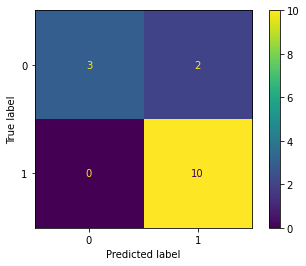

In [30]:
classic.knn_train(x_train, y_train)
classic.knn_evaluate(x_train, y_train, x_test, y_test)

plot_confusion_matrix(classic.knn, x_test, y_test) 

classic.knn_save('./drive/MyDrive/content/')

accuracy score train: 0.9133858267716536
accuracy score test: 0.8666666666666667
precision score test: 0.9
recall score test: 0.9
f1 score test: 0.9


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


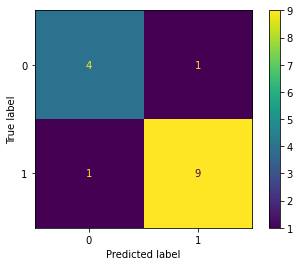

In [31]:
classic.svm_train(x_train, y_train)
classic.svm_evaluate(x_train, y_train, x_test, y_test)

plot_confusion_matrix(classic.svm, x_test, y_test) 

classic.svm_save('./drive/MyDrive/content/')

accuracy score train: 0.8031496062992126
accuracy score test: 0.8666666666666667
precision score test: 0.9
recall score test: 0.9
f1 score test: 0.9


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


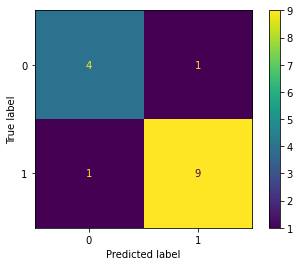

In [32]:
classic.bayes_train(x_train, y_train)
classic.bayes_evaluate(x_train, y_train, x_test, y_test)

plot_confusion_matrix(classic.bayes, x_test, y_test) 

classic.bayes_save('./drive/MyDrive/content/')

In [ ]:
class Conv:
    def __init__(self):
        self.input_shape = (1000, 6)

        optimizer = tensorflow.keras.optimizers.Adam(0.0001, 0.5)

        self.conv = self.build_conv()
        self.conv.compile(
            loss=["binary_crossentropy"], optimizer=optimizer, metrics=["accuracy"]
        )


    def build_conv(self):        
      
        input = tensorflow.keras.Input(shape=self.input_shape)
        
        y = tensorflow.keras.layers.Conv1D(kernel_size=3, filters=64, padding="same", activation='relu')(input)
        y = tensorflow.keras.layers.Dropout(0.5)
        y = tensorflow.keras.layers.Conv1D(kernel_size=3, filters=32, padding="same", activation='relu')(input)
        y = tensorflow.keras.layers.Conv1D(kernel_size=3, filters=16, padding="same", activation='relu')(input)
        y = tensorflow.keras.layers.MaxPooling1D(pool_size=2)(y)
        y = tensorflow.keras.layers.Flatten()(y)
        y = tensorflow.keras.layers.Dense(32, activation='relu')(y)
        y = tensorflow.keras.layers.Dense(1)(y)
        return tensorflow.keras.Model(input, y)

    def train(self, x, y, epochs, batch_size=125, sample_interval=50):

        x = np.array(x)
        y = np.array(y)

        for epoch in range(epochs):

            # -----------
            #  Train
            # -----------

            idx = np.random.randint(0, len(x), batch_size)
            input = tensorflow.reshape(x[idx], (batch_size, 1000, 6))
            expected = y[idx] #Y_train[idx]
            
            loss = self.conv.train_on_batch(input, expected)

            # If at save interval => save
            if epoch % sample_interval == 0:

                print(
                "%d [loss: %f, acc: %.2f%%]"
                % (epoch, loss[0], loss[1])
                )

In [ ]:
conv = Conv()
conv.train(x_train, y_train, epochs=3000, batch_size=100, sample_interval=50)

In [ ]:
conv.conv.evaluate(
    tensorflow.reshape(np.array(x_test), (len(x_test), 1000, 6)), 
    np.array(y_test), 
    batch_size=16
)

# Testy LSTM

In [ ]:
seed(1)
tensorflow.random.set_seed(1)
lstm1 = LSTM_Model(1)
lstm1.train(epochs=100, batch_size=100)

seed(1)
tensorflow.random.set_seed(1)
lstm2 = LSTM_Model(20)
lstm2.train(epochs=100, batch_size=100)

seed(1)
tensorflow.random.set_seed(1)
lstm3 = LSTM_Model(100)
lstm3.train(epochs=100, batch_size=100)

Epoch 1/100
2/2 [==============================] - 2s 35ms/step - loss: 0.6075 - accuracy: 0.4252
Epoch 2/100
2/2 [==============================] - 0s 33ms/step - loss: 0.6025 - accuracy: 0.4252
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 0.5977 - accuracy: 0.4252
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 0.5927 - accuracy: 0.4252
Epoch 5/100
2/2 [==============================] - 0s 27ms/step - loss: 0.5880 - accuracy: 0.4252
Epoch 6/100
2/2 [==============================] - 0s 28ms/step - loss: 0.5835 - accuracy: 0.4252
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 0.5787 - accuracy: 0.4094
Epoch 8/100
2/2 [==============================] - 0s 30ms/step - loss: 0.5741 - accuracy: 0.4094
Epoch 9/100
2/2 [==============================] - 0s 28ms/step - loss: 0.5693 - accuracy: 0.4094
Epoch 10/100
2/2 [==============================] - 0s 28ms/step - loss: 0.5646 - accuracy: 0.4094
Epoch 11/100
2/2 [=

In [ ]:
input = np.reshape(x_test, (len(x_test), 1000, 6))
expected = np.array(y_test)

results = lstm1.lstm.evaluate(input, expected, batch_size=100)
results = lstm2.lstm.evaluate(input, expected, batch_size=100)
results = lstm3.lstm.evaluate(input, expected, batch_size=100)

1/1 [==============================] - 0s 404ms/step - loss: 0.4568 - accuracy: 0.7333


# Testy Random Forest

In [ ]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

class Forests:
    def __init__(self):
        
        self.models = []
        self.models.append(RandomForestClassifier(n_estimators=5, random_state=1))
        self.models.append(RandomForestClassifier(n_estimators=10, random_state=1))
        self.models.append(RandomForestClassifier(n_estimators=100, random_state=1))
        self.models.append(RandomForestClassifier(n_estimators=5, criterion='entropy', random_state=1))
        self.models.append(RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=1))
        self.models.append(RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=1))
        self.models.append(RandomForestClassifier(n_estimators=5, criterion='entropy', min_samples_split=8, random_state=1))
        self.models.append(RandomForestClassifier(n_estimators=10, criterion='entropy', min_samples_split=8, random_state=1))
        self.models.append(RandomForestClassifier(n_estimators=100, criterion='entropy', min_samples_split=8, random_state=1))

    def train(self, x, y):
        for model in self.models:
            model.fit(x,y)

    def evaluate(self, classifier, x_train, y_train, x_test, y_test):
        print("accuracy score train: " + str(accuracy_score(y_train, classifier.predict(x_train))))
        print("accuracy score test: " + str(accuracy_score(y_test, classifier.predict(x_test))))
        print("precision score test: " + str(precision_score(y_test, classifier.predict(x_test))))
        print("recall score test: " + str(recall_score(y_test, classifier.predict(x_test))))
        print("f1 score test: " + str(f1_score(y_test, classifier.predict(x_test))))
        print()

    def models_evaluate(self, x_train, y_train, x_test, y_test):
        for model in self.models:
            self.evaluate(model, x_train, y_train, x_test, y_test)


In [ ]:
forests = Forests()
forests.train(x_train, y_train)
forests.models_evaluate(x_train, y_train, x_test, y_test)

accuracy score train: 0.9763779527559056
accuracy score test: 0.7333333333333333
precision score test: 0.875
recall score test: 0.7
f1 score test: 0.7777777777777777

accuracy score train: 0.9921259842519685
accuracy score test: 0.7333333333333333
precision score test: 1.0
recall score test: 0.6
f1 score test: 0.7499999999999999

accuracy score train: 1.0
accuracy score test: 0.7333333333333333
precision score test: 1.0
recall score test: 0.6
f1 score test: 0.7499999999999999

accuracy score train: 0.9763779527559056
accuracy score test: 0.7333333333333333
precision score test: 1.0
recall score test: 0.6
f1 score test: 0.7499999999999999

accuracy score train: 0.984251968503937
accuracy score test: 0.8
precision score test: 1.0
recall score test: 0.7
f1 score test: 0.8235294117647058

accuracy score train: 1.0
accuracy score test: 0.8
precision score test: 1.0
recall score test: 0.7
f1 score test: 0.8235294117647058

accuracy score train: 0.9763779527559056
accuracy score test: 0.8
pre

# Testy Bayes

In [ ]:
for x in [1e-9,1e-10,1e-11,1e-8,1e-7,5e-9, 1, 0.1, 0.01, 1e-3, 1e-4, 1e-5, 1e-6]:
  gaus=GaussianNB(var_smoothing=x)
  gaus.fit(x_train, y_train)
  print("smoothing: "+str(x))
  print("accuracy score train: " + str(accuracy_score(y_train, gaus.predict(x_train))))
  print("accuracy score test: " + str(accuracy_score(y_test, gaus.predict(x_test))))
  print("precision score test: " + str(precision_score(y_test, gaus.predict(x_test))))
  print("recall score test: " + str(recall_score(y_test, gaus.predict(x_test))))
  print("f1 score test: " + str(f1_score(y_test, gaus.predict(x_test))))
  print("\n-----------------------------------\n")


smoothing: 1e-09
accuracy score train: 0.7874015748031497
accuracy score test: 0.8
precision score test: 0.8888888888888888
recall score test: 0.8
f1 score test: 0.8421052631578948

-----------------------------------

smoothing: 1e-10
accuracy score train: 0.7874015748031497
accuracy score test: 0.8
precision score test: 0.8888888888888888
recall score test: 0.8
f1 score test: 0.8421052631578948

-----------------------------------

smoothing: 1e-11
accuracy score train: 0.7874015748031497
accuracy score test: 0.8
precision score test: 0.8888888888888888
recall score test: 0.8
f1 score test: 0.8421052631578948

-----------------------------------

smoothing: 1e-08
accuracy score train: 0.7874015748031497
accuracy score test: 0.8
precision score test: 0.8888888888888888
recall score test: 0.8
f1 score test: 0.8421052631578948

-----------------------------------

smoothing: 1e-07
accuracy score train: 0.7874015748031497
accuracy score test: 0.8
precision score test: 0.8888888888888888


In [ ]:
for x in [2e-6, 5e-6, 8e-6, 8e-5, 5e-5]:
  gaus=GaussianNB(var_smoothing=x)
  gaus.fit(x_train, y_train)
  print("smoothing: "+str(x))
  print("accuracy score train: " + str(accuracy_score(y_train, gaus.predict(x_train))))
  print("accuracy score test: " + str(accuracy_score(y_test, gaus.predict(x_test))))
  print("precision score test: " + str(precision_score(y_test, gaus.predict(x_test))))
  print("recall score test: " + str(recall_score(y_test, gaus.predict(x_test))))
  print("f1 score test: " + str(f1_score(y_test, gaus.predict(x_test))))
  print("\n-----------------------------------\n")

smoothing: 2e-06
accuracy score train: 0.8031496062992126
accuracy score test: 0.8
precision score test: 0.8888888888888888
recall score test: 0.8
f1 score test: 0.8421052631578948

-----------------------------------

smoothing: 5e-06
accuracy score train: 0.8031496062992126
accuracy score test: 0.8
precision score test: 0.8888888888888888
recall score test: 0.8
f1 score test: 0.8421052631578948

-----------------------------------

smoothing: 8e-06
accuracy score train: 0.8031496062992126
accuracy score test: 0.8
precision score test: 0.8888888888888888
recall score test: 0.8
f1 score test: 0.8421052631578948

-----------------------------------

smoothing: 8e-05
accuracy score train: 0.8031496062992126
accuracy score test: 0.8666666666666667
precision score test: 0.9
recall score test: 0.9
f1 score test: 0.9

-----------------------------------

smoothing: 5e-05
accuracy score train: 0.8031496062992126
accuracy score test: 0.8666666666666667
precision score test: 0.9
recall score te

# SVC testy

In [ ]:
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
gammas = ['scale', 'auto'] 
cs = [0.001, 0.10, 0.1, 1, 10, 100] 
degrees = [0, 0.1, 1, 3, 6]

for kernel in kernels: 
  for gamma in gammas: 
    for c in cs: 
      for degree in degrees: 
        print(kernel, gamma, c, degree) 
        svm = SVC(C=c, kernel=kernel, gamma=gamma, degree=degree, random_state=1).fit(x_train, y_train)
        print("accuracy score train: " + str(accuracy_score(y_train, svm.predict(x_train))))
        print("accuracy score test: " + str(accuracy_score(y_test, svm.predict(x_test))))
        print("precision score test: " + str(precision_score(y_test, svm.predict(x_test))))
        print("recall score test: " + str(recall_score(y_test, svm.predict(x_test))))
        print("f1 score test: " + str(f1_score(y_test, svm.predict(x_test))))
        print("\n-----------------------------------\n")

# Zapis do pliku

In [ ]:
conv = Conv()
conv.train(epochs=1000, batch_size=100, sample_interval=50)

input shape (100, 6)
(None, 6, 1)


ValueError: ignored

In [ ]:
conv.conv.evaluate(
    tensorflow.reshape(np.array(x_test), (len(x_test), len(x_test[0]), 1)), 
    np.array(y_test), 
    batch_size=128
)

In [ ]:
class Models:
    def __init__(self):
      self.classic = Classic()
      self.mlp = MLP()
      self.lstm = LSTM_Model(100)
      self.conv = Conv()

    def train_models(self, x_train, y_train):  
      self.classic.forest_train(x_train, y_train)
      self.classic.knn_train(x_train, y_train)
      self.classic.svm_train(x_train, y_train)
      self.classic.bayes_train(x_train, y_train)
      self.mlp.train(epochs=1000, batch_size=100, sample_interval=50)
      self.lstm.train(epochs=100, batch_size=100)
      self.conv.train(epochs=3000, batch_size=100, sample_interval=50)

    def evaluate_models(self, x_test, y_test):
      mlp_results = self.mlp.mlp.evaluate(x_test, y_test, batch_size=128)
      lstm_results = self.lstm.lstm.evaluate(
          np.reshape(x_test, (len(x_test), 1, len(x_test[0]))), 
          np.reshape(y_test, (len(y_test), 1)),
          batch_size=128
      )
      conv_results = self.conv.conv.evaluate(
          tensorflow.reshape(np.array(x_test), (len(x_test), 1000, 6)), 
          np.array(y_test), 
          batch_size=128
      )
      results = {
          'forest': accuracy_score(y_test, self.classic.forest.predict(x_test)),
          'knn': accuracy_score(y_test, self.classic.knn.predict(x_test)),
          'svm': accuracy_score(y_test, self.classic.svm.predict(x_test)),
          'bayes': accuracy_score(y_test, self.classic.bayes.predict(x_test)),
          'mlp': mlp_results[1],
          'lstm': lstm_results[1],
          'conv': conv_results[1]
      }
      print('\nResults: ', results)
      print('\nBest accuracy: ' + str(max(results.items(), key = lambda k : k[1])))

In [ ]:
models = Models()
models.train_models(x_train, y_train)
models.evaluate_models(x_test, y_test)